In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
def detect_edges(file):
    image = cv2.imread(file)
    scale = 1
    imageSmall = cv2.resize(image, (0, 0), fx=1 / scale, fy=1 / scale)
    gray = cv2.cvtColor(imageSmall, cv2.COLOR_BGR2GRAY)
    #blurred = cv2.GaussianBlur(gray, (15, 15), 0)
    edges = cv2.Canny(gray, threshold1=150, threshold2=300)
    contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = []
    #filter all countours that are either 3 o 4 or 5 sided polygons or polylines
    # for contour in contours:
    #     epsilon = 0.04 * cv2.arcLength(contour, True)
    #     approx = cv2.approxPolyDP(contour, epsilon, True)
        
    #     if len(approx) in [3, 4, 5, 6, 7, 8, 9, 10]:
    #         filtered_contours.append(contour)

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        area = cv2.contourArea(contour)

        if area > 50:
            filtered_contours.append(contour)

    # sort contours by arc length, keep largest 30
    arc = lambda cnt: cv2.arcLength(cnt, False)
    #filtered_contours = sorted(filtered_contours, key=arc, reverse=True)[:5]

    print(len(filtered_contours))

    img2 = image.copy()
    #scale contours back to original image size
    for contour in filtered_contours:
        contour = contour * scale
        cv2.drawContours(img2, [contour], -1, (0, 255, 0), 1)
    return img2, filtered_contours

19


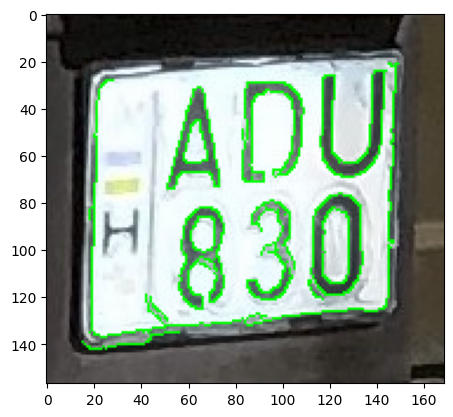

In [6]:
directory_path = 'images'

# List all files in the directory
file_names = os.listdir(directory_path)

# fig, axs = plt.subplots(len(file_names), 1, figsize=(6, 6 * len(file_names)))

# for i, file_name in enumerate(file_names):
#     if i == 1:
#         # Check if the item is a file (not a subdirectory)
#         file = os.path.join(directory_path, file_name)
#         if os.path.isfile(file):
#             axs[i].imshow(detect_edges(file))
#             axs[i].axis('off')  # Turn off axis labels
#             axs[i].set_title(f'Image {i + 1}')

img, _ = detect_edges(os.path.join(directory_path, "PLATE_1.jpg"))

plt.imshow(img)